In [1]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
running_colab = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False
if running_colab:
    from google.colab import drive
    drive.mount('/content/drive')
if running_colab:
    data_path = '/content/drive/MyDrive/Colab Notebooks/ai6th/data/optiver/'
else:
    data_path = '../../data/'

In [3]:
train_df = pd.read_csv(os.path.join(data_path, 'train.csv'))
artists_df = pd.read_csv(os.path.join(data_path, 'artists_info.csv'))
artists_df.loc[artists_df['name'] == 'Albrecht Dürer', 'name'] = 'Albrecht Du rer'
train_df.loc[3896, 'artist'] = 'Titian'
train_df.loc[3986, 'artist'] = 'Alfred Sisley'

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df['artist_no'] = le.fit_transform(train_df['artist'])

In [5]:
# 훈련 그림수 추가
count_df = train_df.groupby(['artist', 'artist_no'])[['id']].count().rename(columns={'id':'count'}).reset_index()
artists_df = pd.merge(artists_df, count_df, left_on='name', right_on='artist')

In [6]:
count_df.sort_values(by='count')

,artist,artist_no,count
25,Jackson Pollock,25,21
14,Eugene Delacroix,14,26
17,Georges Seurat,17,30
6,Caravaggio,6,32
34,Paul Cezanne,34,33
31,Michelangelo,31,34
20,Gustave Courbet,20,42
12,Edvard Munch,12,44
49,William Turner,49,44
8,Diego Rivera,8,50


In [7]:
import cv2


def get_images(img_paths):
    images = []
    for path in img_paths:
        image = cv2.imread(path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        images.append(image)
    return images

In [8]:
def show_images(images):
    assert len(images)<=8
    height = round(len(images)/2)
    width = 2
    plt.figure(figsize=(8,8))   
    for n in range(len(images)):
        plt.subplot(height, width, n+1)
        plt.imshow(images[n])
        plt.grid(False)
    plt.show()

In [9]:
def print_artist_info(artist_name):
    # name, years, genre,nationality
    artist_info = artists_df[artists_df['name']==artist_name]
    print(f"이름 : {artist_info['name'].values[0]}")
    print(f"출생-사망 : {artist_info['years'].values[0]}")
    print(f"장르 : {artist_info['genre'].values[0]}")
    print(f"국가 : {artist_info['nationality'].values[0]}")
    print(f"훈련 그림수 : {artist_info['count'].values[0]}")

In [10]:
import random

def show_samples(artist_no):
    artist_name = le.inverse_transform([artist_no])[0]
    img_paths = list(train_df.loc[train_df['artist_no'] == artist_no, 'img_path'].apply(lambda p: os.path.join(data_path, p)).values)
    images = get_images(random.sample(img_paths, 4))
    print_artist_info(artist_name)
    show_images(images)

이름 : Caravaggio
출생-사망 : 1571 - 1610
장르 : Baroque
국가 : Italian
훈련 그림수 : 32


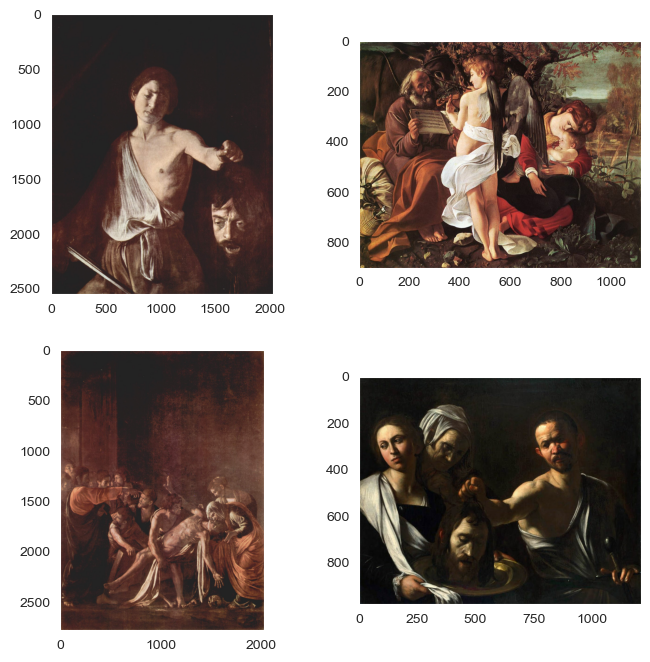

In [11]:
artist_no = 6
show_samples(artist_no)

이름 : William Turner
출생-사망 : 1775 - 1851
장르 : Romanticism
국가 : British
훈련 그림수 : 44


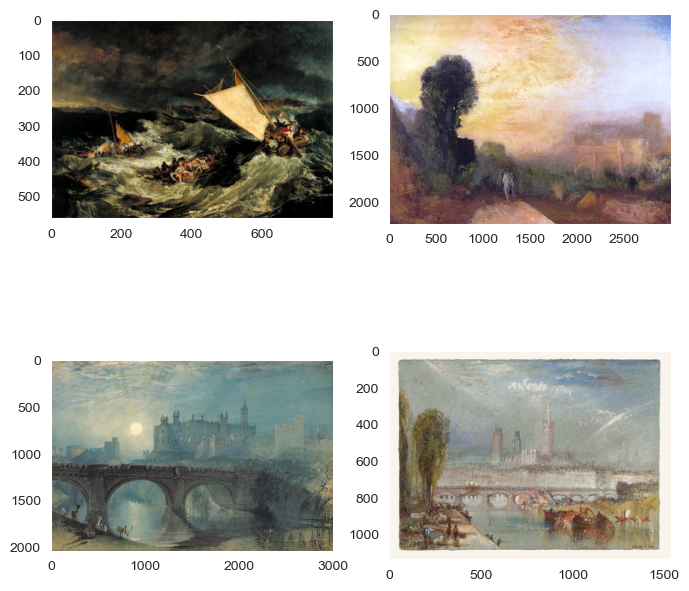

In [12]:
artist_no = 49
show_samples(artist_no)

이름 : Vincent van Gogh
출생-사망 : 1853 – 1890
장르 : Post-Impressionism
국가 : Dutch
훈련 그림수 : 629


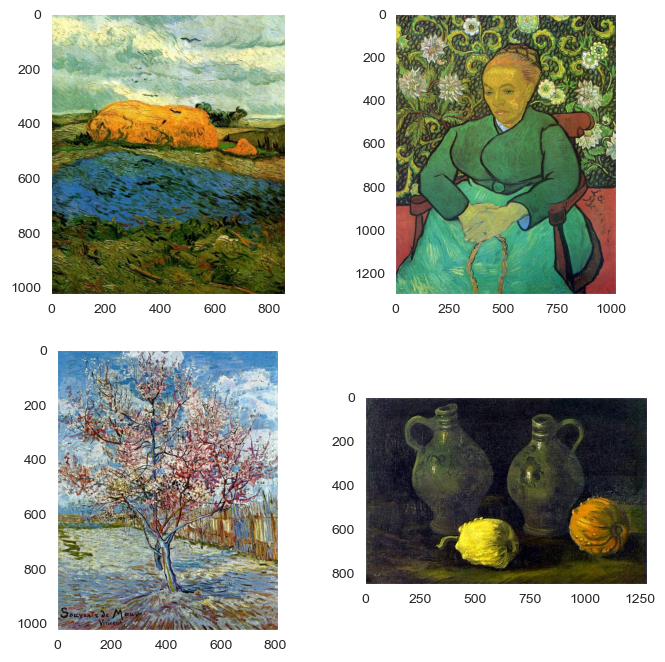

In [12]:
artist_no = 48
show_samples(artist_no)

이름 : Edgar Degas
출생-사망 : 1834 - 1917
장르 : Impressionism
국가 : French
훈련 그림수 : 490


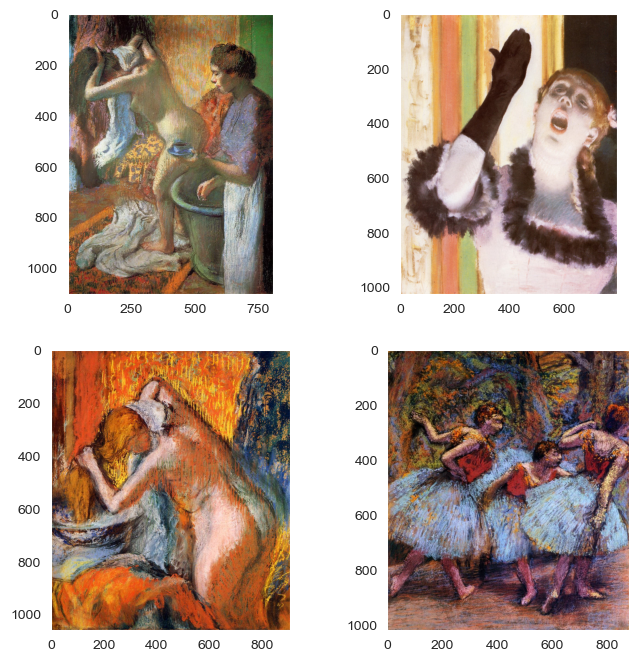

In [13]:
artist_no = 10
show_samples(artist_no)

이름 : Pablo Picasso
출생-사망 : 1881 - 1973
장르 : Cubism
국가 : Spanish
훈련 그림수 : 303


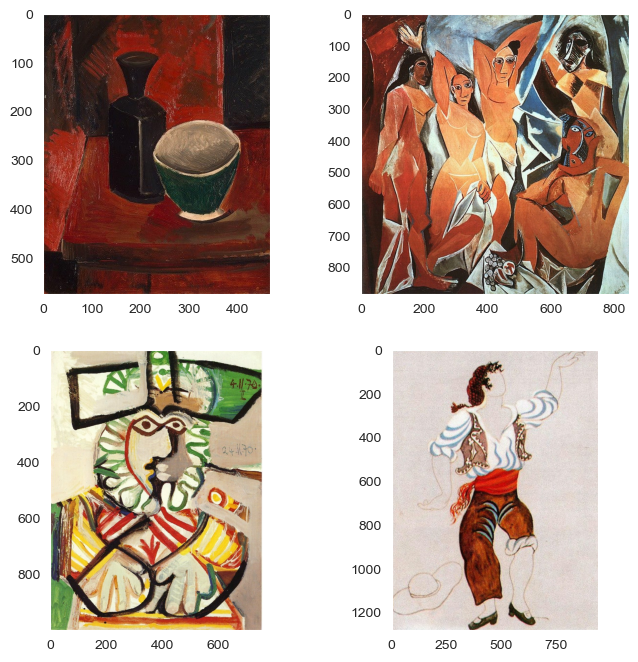

In [27]:
artist_no = 33
show_samples(artist_no)